In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bootstrapping

- *random sampling with replacement*
- resampling technique to simulate drawing new samples (where repeating experiments is not feasible or possible)
- sampling with replacement
- typically, the new sample has size *n*, where *n* is the size of the original dataset

### Sample mean and estimating the population mean

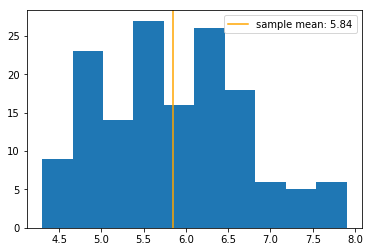

In [43]:
df = pd.read_csv('../datasets/iris/iris.csv')

x = df['sepal_length'].values
x_mean = np.mean(x)
plt.hist(x, bins=10)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.legend(loc=1)
plt.show()

#### Standard Error (SE)

$$SE_{\bar{x}} = \frac{s}{\sqrt{n}}$$

- the standard error *SE* (or *standard error of the mean*) estimates the standard deviation (*s*) of the sample mean ($\bar{x}$)
- i.e., the *SE* measures the variability when taking different samples from the population
- in other words, the *SE* measures the variability between samples, whereas the sample standard deviation measures the variability within a sample
- we use the standard error to judge how "good" our estimate of the population mean ($\mu$) is

In [46]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162276


#### Bootstrapping and estimating the population mean

In [37]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    for i in range(n_bootstrap_samples):
        sample = rng.choice(x, size=x.shape[0], replace=True)
        sample_means[i] = np.mean(sample)
    return sample_means

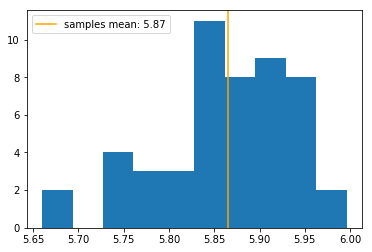

In [42]:
boot_50 = bootstrap_means(x, n_bootstrap_samples=50, seed=123)

boot_mean = np.mean(boot_50)
plt.hist(boot_50, bins=10)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.legend(loc=2)
plt.show()

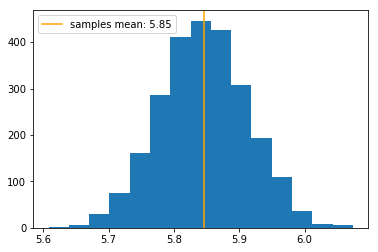

In [44]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

boot_mean = np.mean(boot_2500)
plt.hist(boot_2500, bins=15)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.legend(loc=2)
plt.show()

In [54]:
np.std(boot_2500, ddof=1)

0.066664363123601356

In [55]:
se

0.067611316227598597